# Pokemon data analysis
This project aims to find interesting knowledge from the pokemon dataset. There are some main objectives in the following:
 - Data visualization and correlation between attributes
 - Clustering for legend/not legend
 - frequent item set for types

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



First, read the csv file

In [74]:
X_full = pd.read_csv("data.csv")

List out the data to see the information

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 38 columns):
Id                   801 non-null int64
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness     

As there are too many missing cells on type2 as well as percentage_male, we replace for the following:
 - type2 from null to 'None'
 - percentage_male from null to 0

In [78]:
X_full['type2'].fillna('None', inplace=True)
X_full['percentage_male'].fillna(0, inplace=True)

## Data visualization and correlation between attributes
We are going to plot the scatterplot between different attributes. We want to focus on basic stats and height/weight. Lets have a overview look on heatmap first. We can discover that capture rate has a strong negative impact on other attributes. Also, base total has a strong influence on different basic stats.

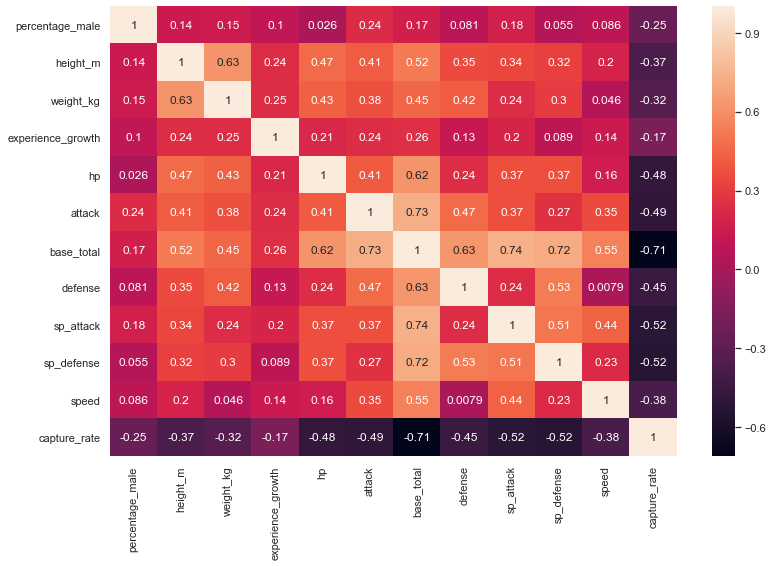

In [37]:
pokemon_mfeatures = ['percentage_male','type1', 'type2', 'height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
poke_mval = X_full[pokemon_mfeatures]
X = pd.DataFrame(poke_mval)
sns.heatmap(X.corr(), annot = True)

Maybe legend characters have extreme values affecting the accuration and corrlation, so we try to filter out and have a look again. After filtering out legends, there are no much changes on correlation.

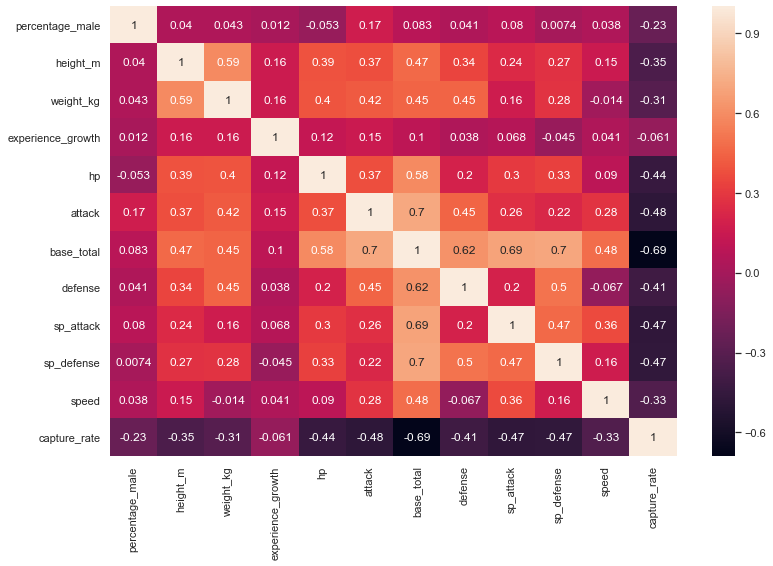

In [40]:
is_not_legend =  X_full['is_legendary']==0
X_not_legend = X[is_not_legend]
X_not_legend = X_not_legend[pokemon_mfeatures]
sns.heatmap(X_not_legend.corr(), annot = True)

Have a look on scatterplot between base total and attack. From the below graph we can discover that there is a positive variation between base_total and attack. 

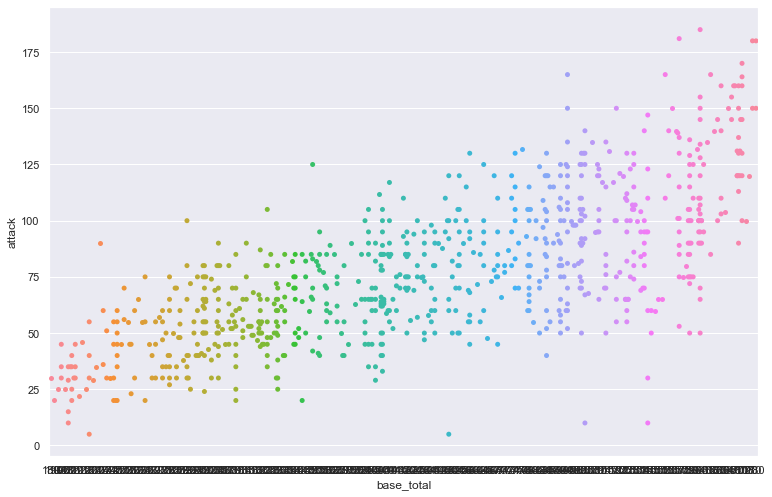

In [38]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['attack'])

Let's calculate different corrlections for attacks and base_total. The pearsons correlation and spearman correlation value between base total and attack are both larger than 0.7.

In [44]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['attack'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['attack'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.730
Spearmans correlation: 0.718


Have a look on scatterplot between base total and hp. From the below graph we can discover that there is a positive variation between base_total and hp. 

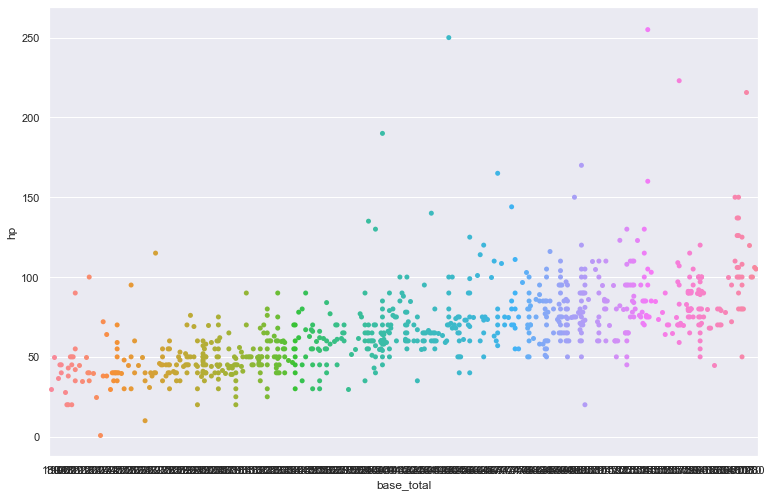

In [45]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['hp'])

Let's calculate different corrlections for hp and base_total. The pearsons correlation and spearman correlation value between base total and hp are both larger than 0.6.

In [48]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['hp'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['hp'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.621
Spearmans correlation: 0.727


Have a look on scatterplot between base total and defense. From the below graph we can discover that there is a positive variation between base_total and defense. 

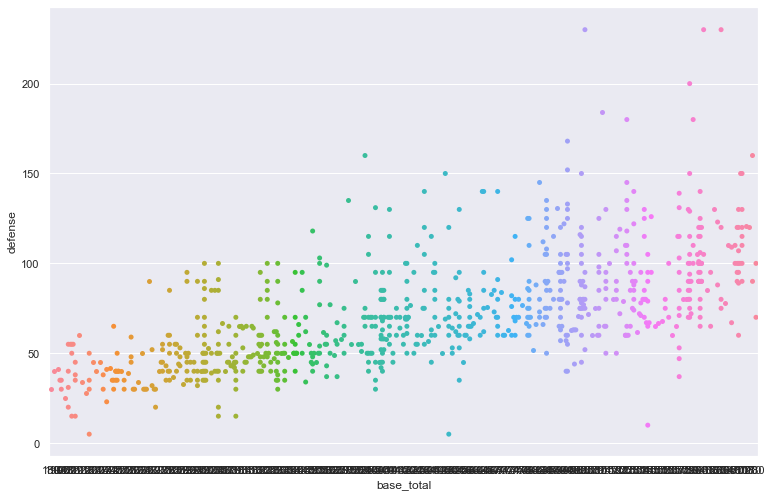

In [49]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['defense'])

Let's calculate different corrlections for defense and base_total. The pearsons correlation and spearman correlation value between base total and defense are both larger than 0.6.

In [50]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['defense'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['defense'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.630
Spearmans correlation: 0.695


Have a look on scatterplot between base total and sp_attack. From the below graph we can discover that there is a positive variation between base_total and sp_attack. 

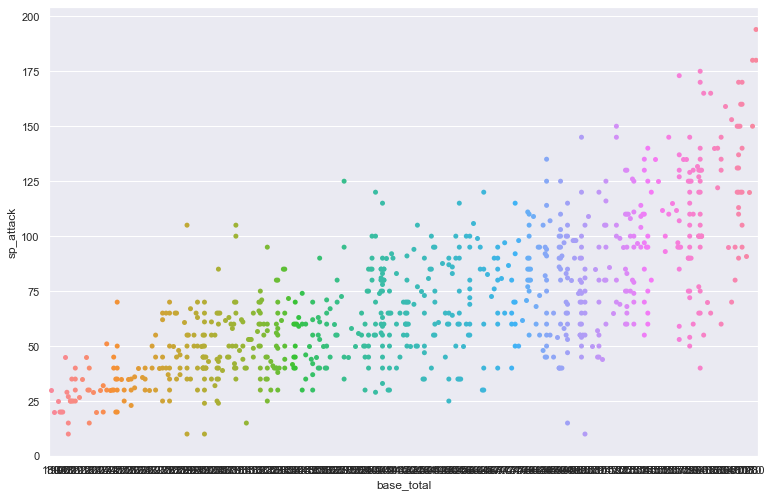

In [51]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['sp_attack'])

Let's calculate different corrlections for sp_attack and base_total. The pearsons correlation and spearman correlation value between base total and sp_attack are both larger than 0.7.

In [52]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['sp_attack'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['sp_attack'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.741
Spearmans correlation: 0.725


Have a look on scatterplot between base total and sp_defense. From the below graph we can discover that there is a positive variation between base_total and sp_defense. 

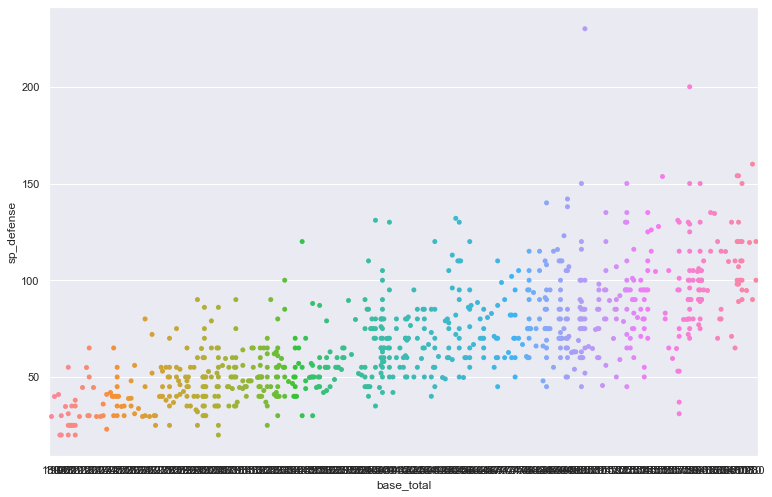

In [53]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['sp_defense'])

Let's calculate different corrlections for sp_defense and base_total. The pearsons correlation and spearman correlation value between base total and sp_defense are both larger than 0.7.

In [54]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['sp_defense'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['sp_defense'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.717
Spearmans correlation: 0.755


Have a look on scatterplot between base total and capture_rate. From the below graph we can discover that there is a negative variation between base_total and capture_rate. 

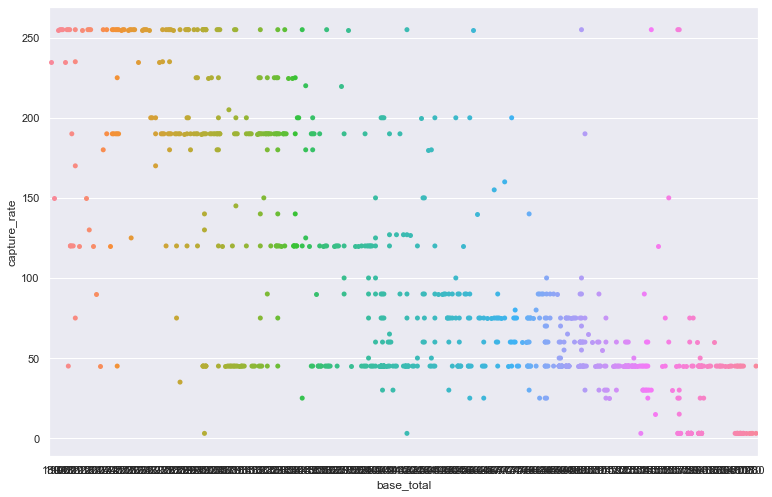

In [55]:
sns.swarmplot(x=X_full['base_total'],
              y=X_full['capture_rate'])

Let's calculate different corrlections for capture_rate and base_total. The pearsons correlation and spearman correlation value between base total and capture_rate are both smaller than -0.7.

In [56]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['capture_rate'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['capture_rate'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.709
Spearmans correlation: -0.708


## Frequent itemset
First, we are going to find out the number of having multi-types.

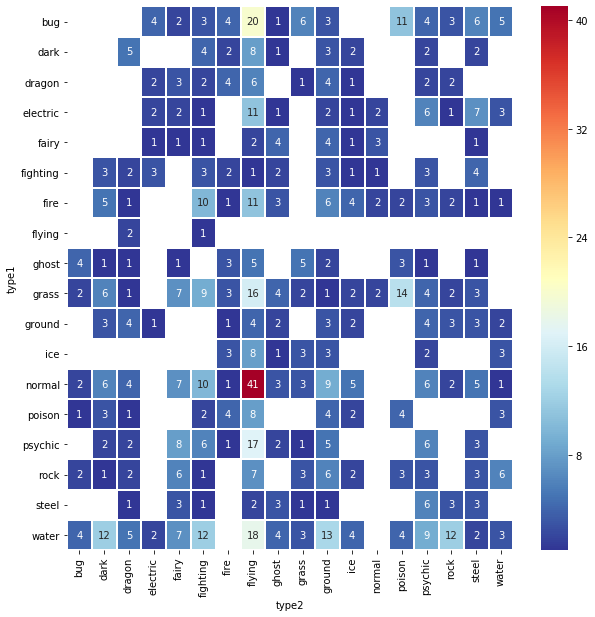

In [24]:
plt.subplots(figsize=(10, 10))
sns.heatmap(
    X_full[X_full['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "RdYlBu_r" # color
)

plt.show()

To implement Apriori Algorithm, our dataset should be a form of array of arrays. Therefore, we convert our dataset by the following script:

In [80]:
records = []
X_full['type1'][0]
for i in range(0, 800):
    record = []
    record.append(X_full['type1'][i])
    if X_full['type2'][i] != "None":
        record.append(X_full['type2'][i])
    records.append(record)

Implementing apriori algorithm. We are using apyori library. As the majority of pokemon has only one type, it is hard to have rules with large min_support as well as confidence. Therefore, we set min_support to 0.0045, min_confidence to 0.15 and min_lift for 1.5 to see the rules.

In [97]:
from apyori import apriori
association_rules = apriori(records, min_support=0.0045, min_confidence=0.15, min_lift=1.5, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['bug'] -> ['poison']
Support: 0.015
Confidence: 0.15584415584415584
Lift: 1.948051948051948
Rule: ['flying'] -> ['normal']
Support: 0.0325
Confidence: 0.2653061224489796
Lift: 1.947200898708107
Rule: ['poison'] -> ['grass']
Support: 0.0175
Confidence: 0.21875000000000003
Lift: 1.8041237113402064
Rule: ['rock'] -> ['ground']
Support: 0.01125
Confidence: 0.15254237288135594
Lift: 1.9067796610169492
Rule: ['steel'] -> ['psychic']
Support: 0.00875
Confidence: 0.15555555555555556
Lift: 1.5176151761517616
